In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



C:\Users\pym66\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


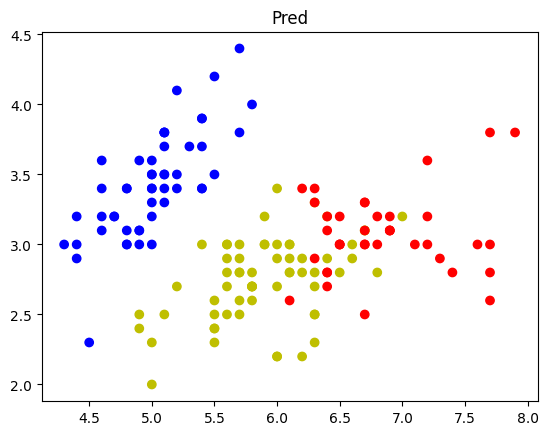

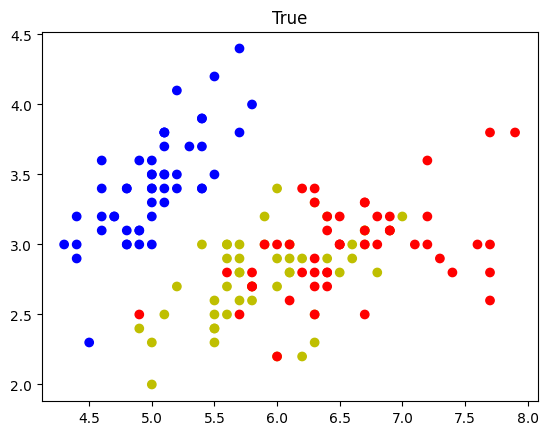

In [5]:
iris=load_iris()
X_train = iris.data
y_train = iris.target

estimator = KMeans(n_clusters=3)#构造聚类器
y_pred =estimator.fit_predict(X_train)#聚类

clr = ['b' if i==0 else 'y' if i==1 else 'r' for i in y_pred]
plt.scatter(X_train[:,0],X_train[:,1],c=clr)
plt.title('Pred')
plt.show()
clr = ['b' if i==0 else 'y' if i==1 else 'r' for i in y_train]
plt.scatter(X_train[:,0],X_train[:,1],c=clr)
plt.title('True')
plt.show()


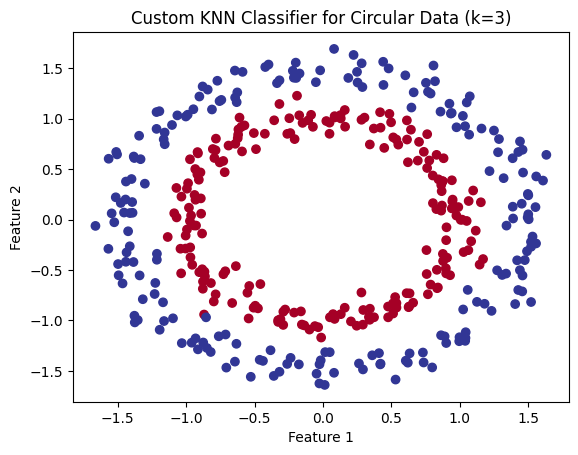

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成环状数据
def generate_circle_data(n_samples=200, noise=0.1):
    np.random.seed(42)
    t = np.linspace(0, 2 * np.pi, n_samples)
    inner_circle = np.array([np.cos(t), np.sin(t)]).T
    outer_circle = inner_circle * 1.5
    X = np.vstack([inner_circle, outer_circle])
    y = np.array([0] * n_samples + [1] * n_samples)
    X += np.random.normal(0, noise, X.shape)
    return X, y

# 自定义KNN算法
def custom_knn_predict(X, X_train, y_train, k):
    y_pred = []
    for x in X:
        distances = [np.linalg.norm(x - x_train) for x_train in X_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = [y_train[i] for i in nearest_indices]
        y_pred.append(max(set(nearest_labels), key=nearest_labels.count))
    return np.array(y_pred)

# 主函数
def main():
    X, y = generate_circle_data(n_samples=200, noise=0.1)
    
    # 设定K值
    k = 3
    
    # 预测
    y_pred = custom_knn_predict(X, X, y, k)
    
    # 可视化数据和决策边界
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Custom KNN Classifier for Circular Data (k={})'.format(k))
    plt.show()

if __name__ == "__main__":
    main()
